In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

# Time Series Approach

Filling missing values

In [565]:
df = pd.read_csv('HPIpredictionData.csv', parse_dates=['DATE'], index_col='DATE')

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 1987-01-01 to 2021-12-01
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HPI                       420 non-null    float64
 1   GDP                       140 non-null    float64
 2   UNEMPLOYMENT              420 non-null    float64
 3   PROPERTY_PRICE            139 non-null    float64
 4   PERSONAL INCOME           420 non-null    float64
 5   POPULATION                420 non-null    float64
 6   LISTING                   66 non-null     float64
 7   PERMIT                    420 non-null    float64
 8   NEW_HOMES                 420 non-null    float64
 9   DELINQUENCY               124 non-null    float64
 10  YEAR                      420 non-null    int64  
 11  Men Married1              360 non-null    float64
 12  Men Unmarried Divorced    360 non-null    float64
 13  Men Unmarried Widowed     360 non-null    floa

In [567]:
df.drop('YEAR',axis = 1,inplace=True)

In [568]:
df

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,LISTING,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,Men Unmarried Divorced,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants
DATE,,,,,,,,,,,,,,,,,
1987-01-01,63.962,4722.156,6.6,85.4651,3831.4,241857.0,NaN,1690.0,1774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599889.0
1987-02-01,64.422,NaN,6.6,NaN,3858.1,242005.0,NaN,1689.0,1784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599889.0
1987-03-01,64.733,NaN,6.6,NaN,3878.4,242166.0,NaN,1704.0,1726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599889.0
1987-04-01,65.129,4806.160,6.3,86.3612,3891.1,242338.0,NaN,1601.0,1614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599889.0
1987-05-01,65.563,NaN,6.3,NaN,3925.0,242516.0,NaN,1500.0,1628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,267.183,NaN,5.2,NaN,20916.3,332295.0,615621.0,1721.0,1573.0,NaN,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,NaN
2021-09-01,270.225,NaN,4.7,NaN,20719.8,332403.0,621196.0,1586.0,1550.0,NaN,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,NaN
2021-10-01,272.976,24008.472,4.6,NaN,20843.1,332513.0,611928.0,1653.0,1552.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,NaN


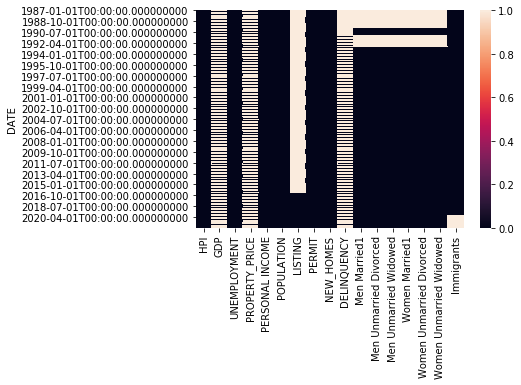

In [569]:
sns.heatmap(df.isnull())

In [570]:
#####Percentage of null values
print("Attribute: Percentage of null values")
for i in df.columns:
    print(i + ": " + str((round(df[i].isnull().sum()/len(df),2))))

Attribute: Percentage of null values
HPI: 0.0
GDP: 0.67
UNEMPLOYMENT: 0.0
PROPERTY_PRICE: 0.67
PERSONAL INCOME: 0.0
POPULATION: 0.0
LISTING: 0.84
PERMIT: 0.0
NEW_HOMES: 0.0
DELINQUENCY: 0.7
Men Married1: 0.14
Men Unmarried Divorced: 0.14
Men Unmarried Widowed: 0.14
Women Married1: 0.14
Women Unmarried Divorced: 0.14
Women Unmarried Widowed: 0.14
Immigrants: 0.06


In [571]:
marital.columns

Index(['Men Married1', 'Men Unmarried Divorced', 'Men Unmarried Widowed',
       'Women Married1', 'Women Unmarried Divorced',
       'Women Unmarried Widowed'],
      dtype='object')

In [572]:
#forward linear interpolation
df['Immigrants'].interpolate(method = 'linear',inplace=True)

In [573]:
#backward linear interpolation
marital = pd.read_csv('marital.csv')
marital.drop(["Unnamed: 0","YEAR"],axis=1,inplace=True)
for i in marital.columns:
    df[i].interpolate(method = 'linear', limit_direction = 'backward',inplace=True)

In [574]:
#nearest neighbour interpolation
l = ['GDP','PROPERTY_PRICE','DELINQUENCY']
for i in l:
    df[i].interpolate(method = 'nearest',inplace=True)

In [575]:
#now applying linear interploation in both direction
l = ['GDP','PROPERTY_PRICE','DELINQUENCY']
for i in l:
    df[i].interpolate(method = 'linear', limit_direction = 'both',inplace=True)

In [576]:
#applying backward interpolation on listing



In [577]:
df.isnull().sum()

HPI                           0
GDP                           0
UNEMPLOYMENT                  0
PROPERTY_PRICE                0
PERSONAL INCOME               0
POPULATION                    0
LISTING                     354
PERMIT                        0
NEW_HOMES                     0
DELINQUENCY                   0
Men Married1                  0
Men Unmarried Divorced        0
Men Unmarried Widowed         0
Women Married1                0
Women Unmarried Divorced      0
Women Unmarried Widowed       0
Immigrants                    0
dtype: int64

In [578]:
df

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,LISTING,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,Men Unmarried Divorced,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants
DATE,,,,,,,,,,,,,,,,,
1987-01-01,63.962,4722.156,6.6,85.4651,3831.4,241857.0,NaN,1690.0,1774.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-02-01,64.422,4722.156,6.6,85.4651,3858.1,242005.0,NaN,1689.0,1784.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-03-01,64.733,4806.160,6.6,86.3612,3878.4,242166.0,NaN,1704.0,1726.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-04-01,65.129,4806.160,6.3,86.3612,3891.1,242338.0,NaN,1601.0,1614.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-05-01,65.563,4806.160,6.3,86.3612,3925.0,242516.0,NaN,1500.0,1628.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,267.183,23202.344,5.2,153.8611,20916.3,332295.0,615621.0,1721.0,1573.0,2.30,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1031765.0
2021-09-01,270.225,24008.472,4.7,153.8611,20719.8,332403.0,621196.0,1586.0,1550.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1031765.0
2021-10-01,272.976,24008.472,4.6,153.8611,20843.1,332513.0,611928.0,1653.0,1552.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1031765.0


# Exploratory Data Analysis

Correlation

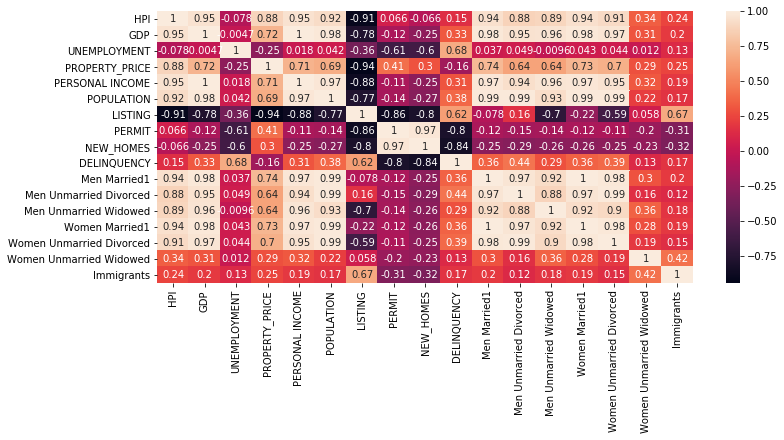

In [558]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(),annot = True)

Univaraite Analysis

Bivariate Analysis


In [560]:
df

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,LISTING,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,Men Unmarried Divorced,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants
DATE,,,,,,,,,,,,,,,,,
1987-01-01,63.962,4722.156,6.6,85.4651,3831.4,241857.0,NaN,1690.0,1774.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-02-01,64.422,4722.156,6.6,85.4651,3858.1,242005.0,NaN,1689.0,1784.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-03-01,64.733,4806.160,6.6,86.3612,3878.4,242166.0,NaN,1704.0,1726.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-04-01,65.129,4806.160,6.3,86.3612,3891.1,242338.0,NaN,1601.0,1614.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
1987-05-01,65.563,4806.160,6.3,86.3612,3925.0,242516.0,NaN,1500.0,1628.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,267.183,23202.344,5.2,153.8611,20916.3,332295.0,615621.0,1721.0,1573.0,2.30,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1031765.0
2021-09-01,270.225,24008.472,4.7,153.8611,20719.8,332403.0,621196.0,1586.0,1550.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1031765.0
2021-10-01,272.976,24008.472,4.6,153.8611,20843.1,332513.0,611928.0,1653.0,1552.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1031765.0


# Feature Engineering

In [579]:
#Now we can make a function that can create time-series features from our data.
date = pd.read_csv('HPIpredictionData.csv')
date['DATE'] = date['DATE'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

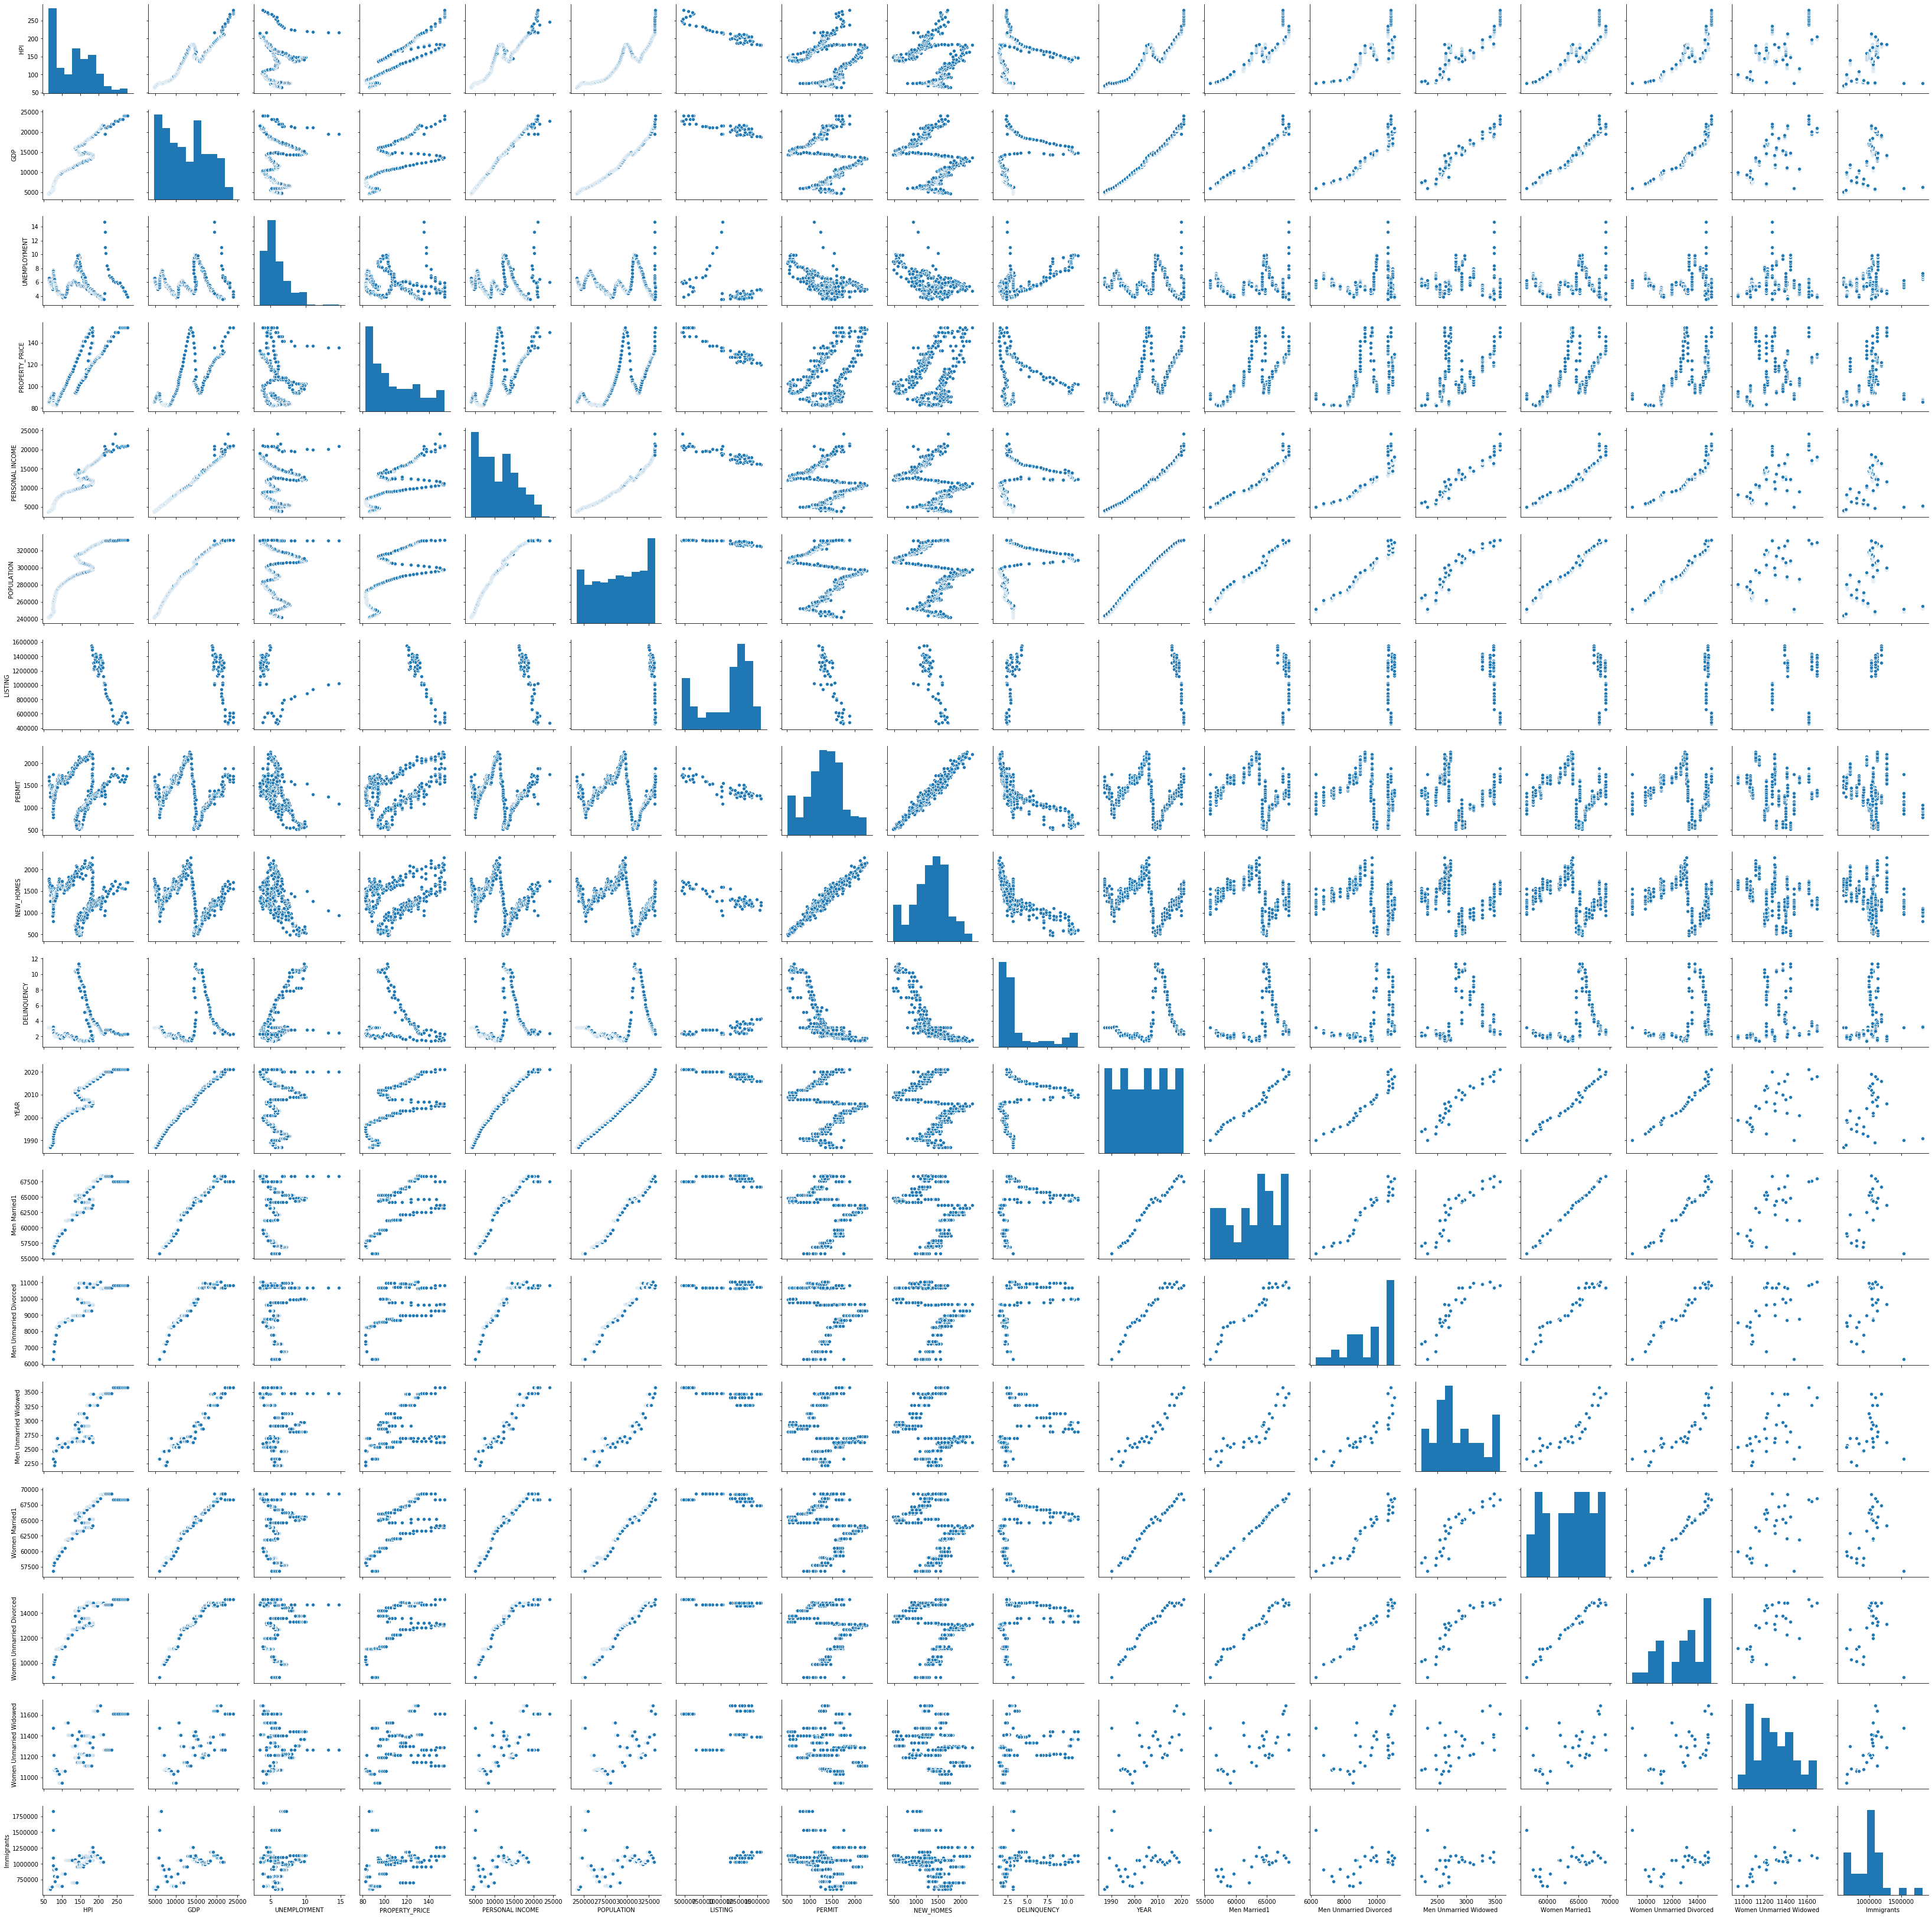

In [442]:
sns.pairplot(data)

In [580]:
df['date'] = df.index
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekofyear'] = df['date'].dt.weekofyear

In [584]:
df

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,...,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants,date,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,63.962,4722.156,6.6,85.4651,3831.4,241857.0,1690.0,1774.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-01-01,1,1,1987,1
1987-02-01,64.422,4722.156,6.6,85.4651,3858.1,242005.0,1689.0,1784.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-02-01,1,2,1987,5
1987-03-01,64.733,4806.160,6.6,86.3612,3878.4,242166.0,1704.0,1726.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-03-01,1,3,1987,9
1987-04-01,65.129,4806.160,6.3,86.3612,3891.1,242338.0,1601.0,1614.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-04-01,2,4,1987,14
1987-05-01,65.563,4806.160,6.3,86.3612,3925.0,242516.0,1500.0,1628.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-05-01,2,5,1987,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,267.183,23202.344,5.2,153.8611,20916.3,332295.0,1721.0,1573.0,2.30,67544.0,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-08-01,3,8,2021,30
2021-09-01,270.225,24008.472,4.7,153.8611,20719.8,332403.0,1586.0,1550.0,2.33,67544.0,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-09-01,3,9,2021,35
2021-10-01,272.976,24008.472,4.6,153.8611,20843.1,332513.0,1653.0,1552.0,2.33,67544.0,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-10-01,4,10,2021,39


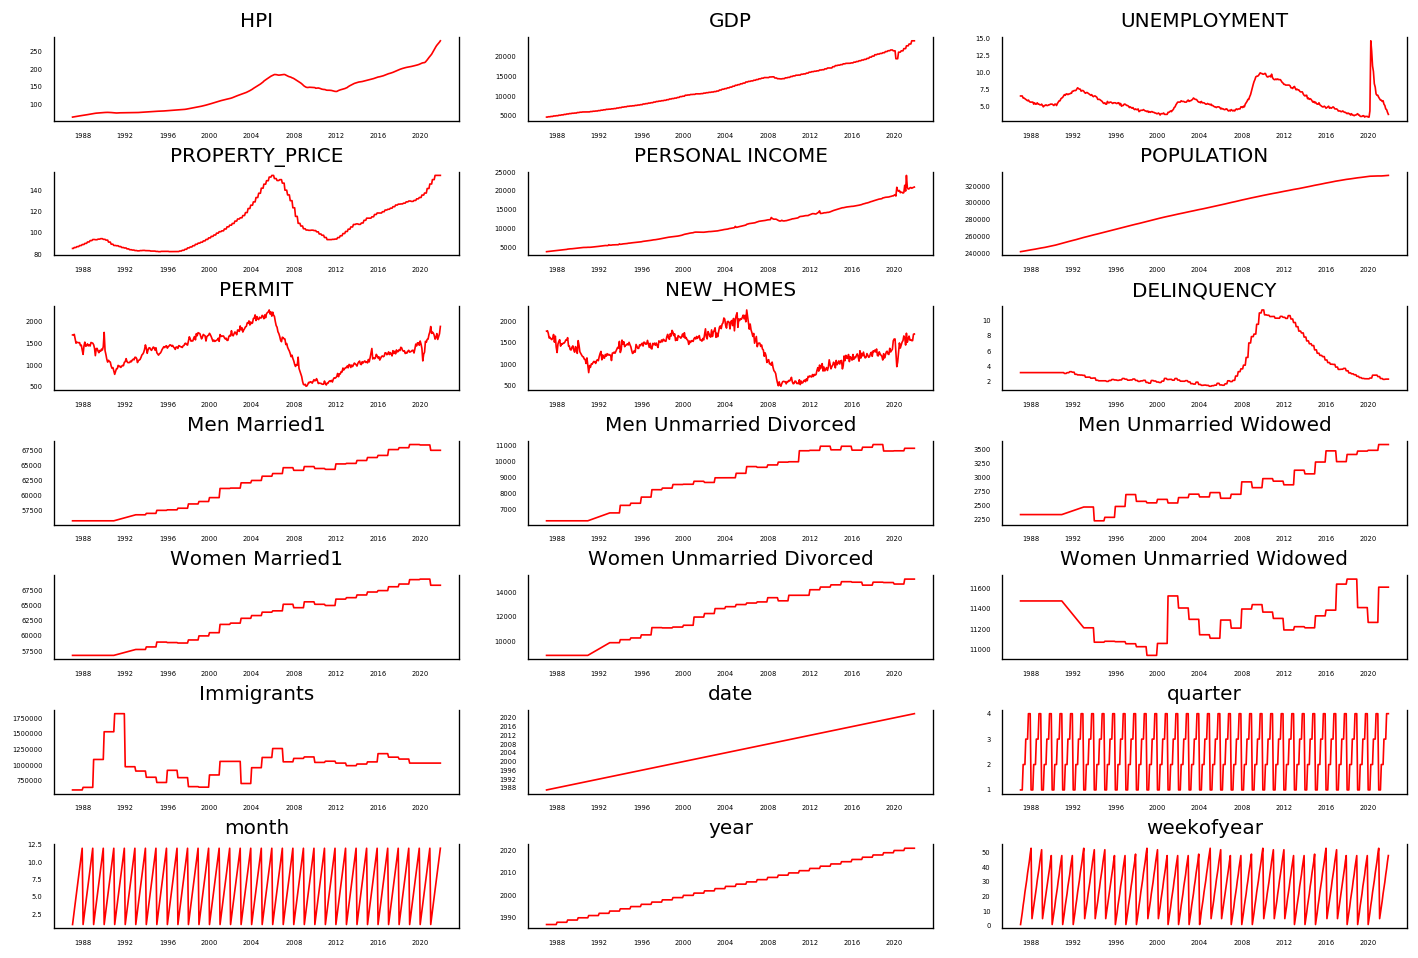

In [585]:
#visulize time series
# Plot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=7, ncols=3, dpi=120, figsize=(12,8))
fig.tight_layout()
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)

In [581]:
df

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,LISTING,PERMIT,NEW_HOMES,DELINQUENCY,...,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants,date,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,63.962,4722.156,6.6,85.4651,3831.4,241857.0,NaN,1690.0,1774.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-01-01,1,1,1987,1
1987-02-01,64.422,4722.156,6.6,85.4651,3858.1,242005.0,NaN,1689.0,1784.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-02-01,1,2,1987,5
1987-03-01,64.733,4806.160,6.6,86.3612,3878.4,242166.0,NaN,1704.0,1726.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-03-01,1,3,1987,9
1987-04-01,65.129,4806.160,6.3,86.3612,3891.1,242338.0,NaN,1601.0,1614.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-04-01,2,4,1987,14
1987-05-01,65.563,4806.160,6.3,86.3612,3925.0,242516.0,NaN,1500.0,1628.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-05-01,2,5,1987,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,267.183,23202.344,5.2,153.8611,20916.3,332295.0,615621.0,1721.0,1573.0,2.30,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-08-01,3,8,2021,30
2021-09-01,270.225,24008.472,4.7,153.8611,20719.8,332403.0,621196.0,1586.0,1550.0,2.33,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-09-01,3,9,2021,35
2021-10-01,272.976,24008.472,4.6,153.8611,20843.1,332513.0,611928.0,1653.0,1552.0,2.33,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-10-01,4,10,2021,39


In [582]:
df.drop('LISTING',axis=1,inplace=True)
df.to_csv('HPIpredictionfinal1.csv',index=True)

In [564]:
df

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,LISTING,PERMIT,NEW_HOMES,DELINQUENCY,...,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants,date,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,63.962,4722.156,6.6,85.4651,3831.4,241857.0,NaN,1690.0,1774.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-01-01,1,1,1987,1
1987-02-01,64.422,4722.156,6.6,85.4651,3858.1,242005.0,NaN,1689.0,1784.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-02-01,1,2,1987,5
1987-03-01,64.733,4806.160,6.6,86.3612,3878.4,242166.0,NaN,1704.0,1726.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-03-01,1,3,1987,9
1987-04-01,65.129,4806.160,6.3,86.3612,3891.1,242338.0,NaN,1601.0,1614.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-04-01,2,4,1987,14
1987-05-01,65.563,4806.160,6.3,86.3612,3925.0,242516.0,NaN,1500.0,1628.0,3.18,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-05-01,2,5,1987,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,267.183,23202.344,5.2,153.8611,20916.3,332295.0,615621.0,1721.0,1573.0,2.30,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-08-01,3,8,2021,30
2021-09-01,270.225,24008.472,4.7,153.8611,20719.8,332403.0,621196.0,1586.0,1550.0,2.33,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-09-01,3,9,2021,35
2021-10-01,272.976,24008.472,4.6,153.8611,20843.1,332513.0,611928.0,1653.0,1552.0,2.33,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-10-01,4,10,2021,39


# Machine Learning appraoch.

Filling missing values.

In [632]:
data = pd.read_csv('HPIpredictionData.csv')
#convert Date to datetime 
data['DATE'] = data['DATE'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

In [633]:
## gdp
gdp = pd.read_csv('GDP.csv')
gdp['DATE'] = gdp['DATE'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d")) #convert to datetime

In [634]:
gdp_l = [gdp['DATE'].iloc[i] for i in range(len(gdp))]

In [635]:
#data['GDP'] = data['GDP'].apply(lambda x : min(gdp_l, key=lambda sub: abs(sub - data['DATE']))
for i in range(len(data)):
    if(pd.isnull(data['GDP'].iloc[i])):
        date = min(gdp_l, key=lambda sub: abs(sub - data['DATE'].iloc[i]))
        #print(date)
        #print(gdp[gdp['DATE']==date]['GDP'])
        data['GDP'].iloc[i] = gdp[gdp['DATE']==date]['GDP'].values[0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [636]:
data['GDP']

0       4722.156
1       4722.156
2       4806.160
3       4806.160
4       4806.160
         ...    
415    23202.344
416    23992.355
417    24008.472
418    23992.355
419    23992.355
Name: GDP, Length: 420, dtype: float64

In [637]:
##propery prices
prop = pd.read_csv('QUSR628BIS.csv')
prop['DATE'] = prop['DATE'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

In [638]:
prop_l = [prop['DATE'].iloc[i] for i in range(len(prop))]
for i in range(len(data)):
    if(pd.isnull(data['PROPERTY_PRICE'].iloc[i])):
        date = min(prop_l, key=lambda sub: abs(sub - data['DATE'].iloc[i]))
        #print(date)
        #print(gdp[gdp['DATE']==date]['GDP'])
        data['PROPERTY_PRICE'].iloc[i] = prop[prop['DATE']==date]['QUSR628BIS'].values[0]

In [639]:
##delinquency
delin = pd.read_csv('DRSFRMACBS.csv')
delin['DATE'] = delin['DATE'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

In [640]:
delin_l = [delin['DATE'].iloc[i] for i in range(len(delin))]
for i in range(len(data)):
    if(pd.isnull(data['DELINQUENCY'].iloc[i])):
        date = min(delin_l, key=lambda sub: abs(sub - data['DATE'].iloc[i]))
        #print(date)
        #print(gdp[gdp['DATE']==date]['GDP'])
        data['DELINQUENCY'].iloc[i] = delin[delin['DATE']==date]['DRSFRMACBS'].values[0]

In [641]:
marital = pd.read_csv('marital.csv')
marital.drop(["Unnamed: 0","YEAR"],axis=1,inplace=True)

In [642]:
l = list(marital.columns)
l.append('DATE')
data[l].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Men Married1              360 non-null    float64       
 1   Men Unmarried Divorced    360 non-null    float64       
 2   Men Unmarried Widowed     360 non-null    float64       
 3   Women Married1            360 non-null    float64       
 4   Women Unmarried Divorced  360 non-null    float64       
 5   Women Unmarried Widowed   360 non-null    float64       
 6   DATE                      420 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.1 KB


In [643]:
#imputing the null values in the 6 columns using random samples
def impute_nan(data,variable):
    for i in range(len(data)):
        if(pd.isnull(data[variable].iloc[i])):
            data[variable].iloc[i] = random.choice(data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0).values)

In [644]:
l = marital.columns.values
l = list(l)
l.append('Immigrants')

In [645]:
for i in l:
    impute_nan(data,i)

In [646]:
data.isnull().sum()

DATE                          0
HPI                           0
GDP                           0
UNEMPLOYMENT                  0
PROPERTY_PRICE                0
PERSONAL INCOME               0
POPULATION                    0
LISTING                     354
PERMIT                        0
NEW_HOMES                     0
DELINQUENCY                   0
YEAR                          0
Men Married1                  0
Men Unmarried Divorced        0
Men Unmarried Widowed         0
Women Married1                0
Women Unmarried Divorced      0
Women Unmarried Widowed       0
Immigrants                    0
dtype: int64

In [647]:
data.drop(['LISTING','DATE','YEAR'],axis=1,inplace=True)

In [648]:
data

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,Men Unmarried Divorced,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants
0,63.962,4722.156,6.6,85.4651,3831.4,241857.0,1690.0,1774.0,3.18,57068.0,9633.0,2697.0,66287.0,13308.0,10944.0,599889.0
1,64.422,4722.156,6.6,85.4651,3858.1,242005.0,1689.0,1784.0,3.18,65369.0,9633.0,2569.0,63901.0,14434.0,11642.0,599889.0
2,64.733,4806.160,6.6,86.3612,3878.4,242166.0,1704.0,1726.0,3.18,64842.0,9633.0,3469.0,65202.0,8845.0,11214.0,599889.0
3,65.129,4806.160,6.3,86.3612,3891.1,242338.0,1601.0,1614.0,3.18,66695.0,9958.0,3479.0,65604.0,14434.0,11408.0,599889.0
4,65.563,4806.160,6.3,86.3612,3925.0,242516.0,1500.0,1628.0,3.18,65281.0,9958.0,3124.0,66287.0,11116.0,11225.0,599889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,267.183,23202.344,5.2,153.8611,20916.3,332295.0,1721.0,1573.0,2.30,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1016518.0
416,270.225,23992.355,4.7,153.8611,20719.8,332403.0,1586.0,1550.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1058902.0
417,272.976,24008.472,4.6,153.8611,20843.1,332513.0,1653.0,1552.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1122257.0
418,276.189,23992.355,4.2,153.8611,20960.5,332598.0,1717.0,1703.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1058902.0


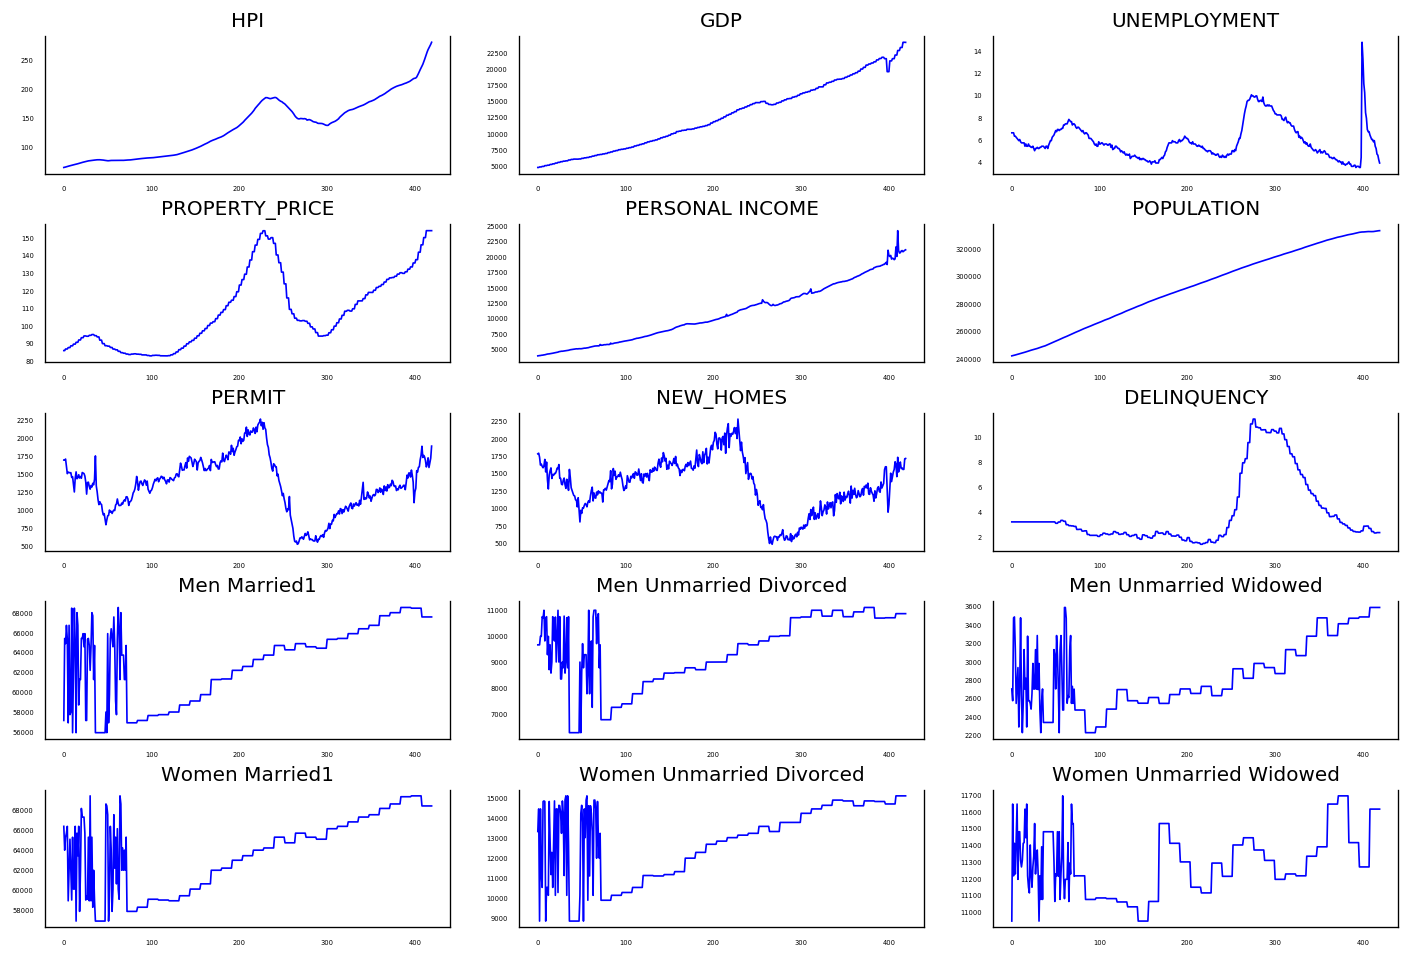

In [652]:
# Plot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(12,8))
fig.tight_layout()
for i, ax in enumerate(axes.flatten()):
    df = data[data.columns[i]]
    ax.plot(df, color='blue', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)

In [655]:
data.to_csv('HPIpredictionfinal2.csv',index=False)